<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB
Outliers in Nitrogen: 0       90
25      85
26      80
27     110
28      86
30     100
31     109
40     117
41      92
42     114
48      78
57     126
58     102
63     116
64     117
138     90
139     90
140     90
213     85
214     85
215     85
216     80
217     80
218     80
219    110
220    110
221    110
222     86
223     86
224     86
228    100
229    100
230    100
231    10

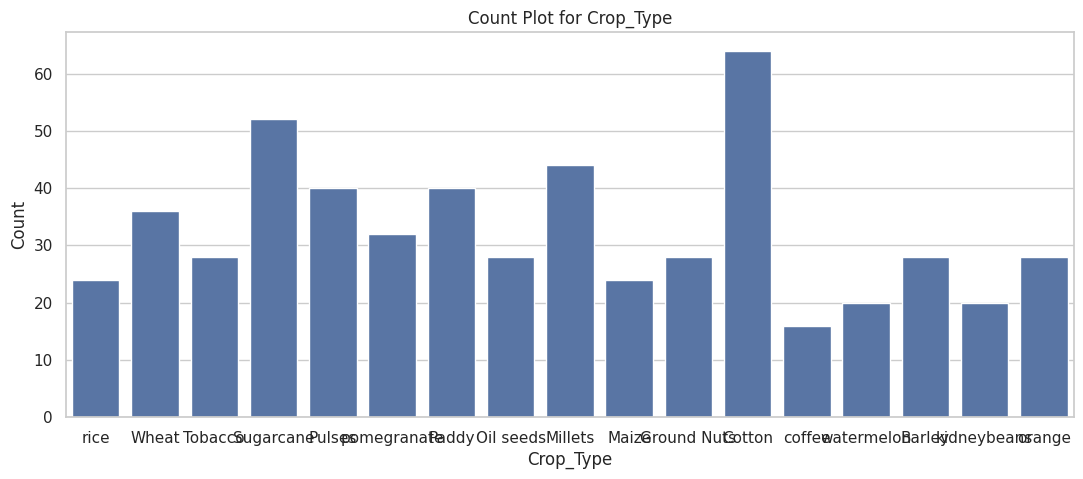

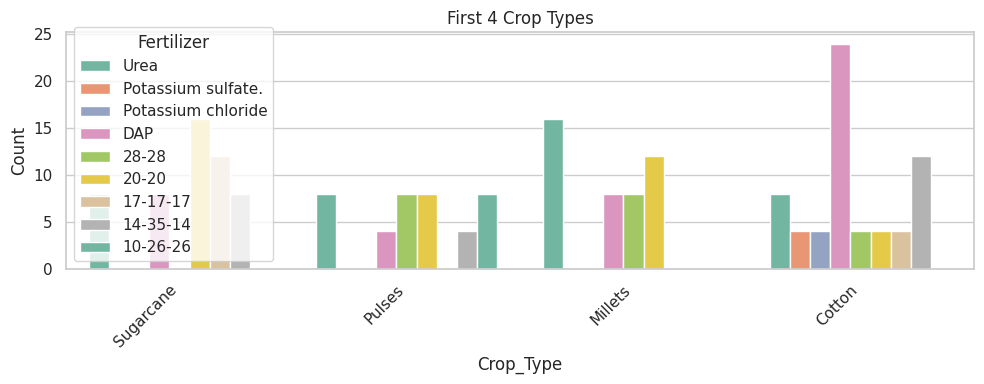

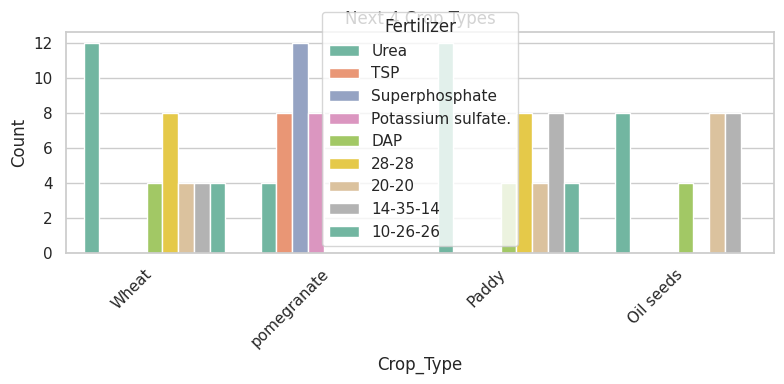

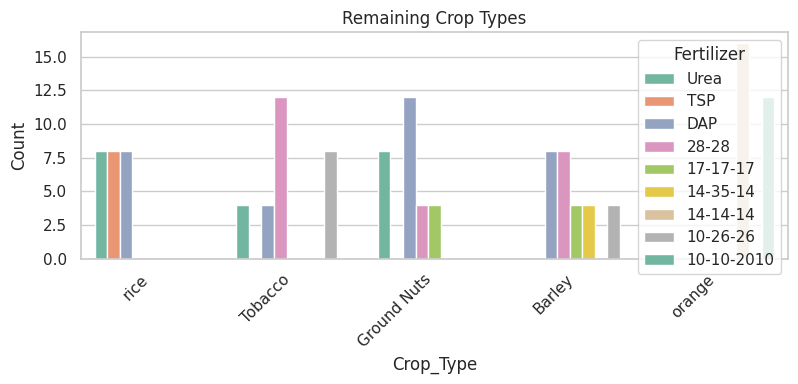

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 388 to 102
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nitrogen               441 non-null    float64
 1   Phosphorous            441 non-null    float64
 2   Potassium              441 non-null    float64
 3   Temperature            441 non-null    float64
 4   Soil_Type_Clayey       441 non-null    float64
 5   Soil_Type_Loamy        441 non-null    float64
 6   Soil_Type_Red          441 non-null    float64
 7   Soil_Type_Sandy        441 non-null    float64
 8   Crop_Type_Cotton       441 non-null    float64
 9   Crop_Type_Ground Nuts  441 non-null    float64
 10  Crop_Type_Maize        441 non-null    float64
 11  Crop_Type_Millets      441 non-null    float64
 12  Crop_Type_Oil seeds    441 non-null    float64
 13  Crop_Type_Paddy        441 non-null    float64
 14  Crop_Type_Pulses       441 non-null    float64
 15  Crop_Type

NameError: name 'model' is not defined

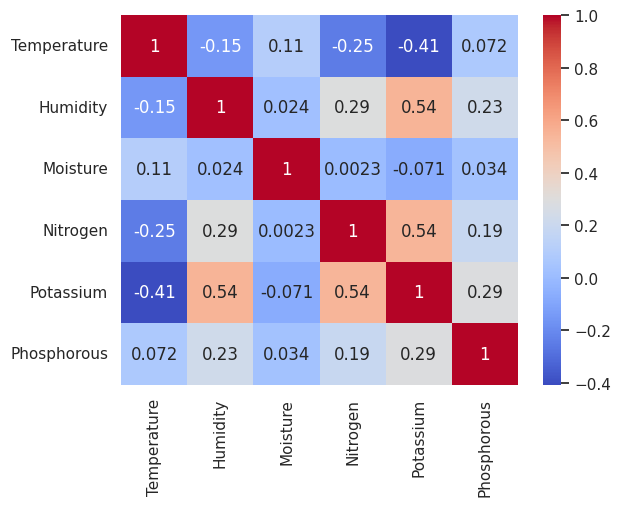

In [7]:
# -*- coding: utf-8 -*-
"""Fertipredict[DTM].ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/13O9smtYX7S-DzkHBOTYruM7LSoEqZOya
"""

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/f2.csv")
df.head()

df.isnull().sum()

df.shape

#checking unique values
df.nunique()

df['Fertilizer'].unique()

df['Crop_Type'].unique()

#statistical parameters
df.describe(include='all')

df.info()

import numpy as np

def find_outliers_iqr(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
numerical_features = ['Nitrogen', 'Phosphorous', 'Potassium', 'Temperature']
for column in numerical_features:
    outliers = find_outliers_iqr(df[column])
    print(f"Outliers in {column}: {outliers}")

df.drop(outliers)

#The plot that shows the count (frequency) of each unique crop type in the dataset
#The x-axis represents the different crop types.
#The y-axis represents the count (the number of occurrences) of each crop type in the dataset
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

#first 4 crop types
part1_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

# Split the data into three parts: next 4 crop types
part2_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

# Split the data into three parts: remaining crop types
part3_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

corr = df.corr(numeric_only=True)
corr

sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

# categorical features  encoding
categorical_features = ['Soil_Type', 'Crop_Type']

encoder = OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore')

encoded_categorical = encoder.fit_transform(df[categorical_features])

# Create DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine with numerical features
X = pd.concat([df[numerical_features].reset_index(drop=True), encoded_df], axis=1)
y = df['Fertilizer']

# Initialize and fit the LabelEncoders
fertilizer_encoder = LabelEncoder()
y = fertilizer_encoder.fit_transform(y)

# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.info()

from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
print("Classification Report for Fertilizer (SVM):\n", classification_report(y_test, y_pred_svm))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create and train the KNN model
knn_model = KNeighborsClassifier()  # Initialize knn_model here
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
print("Classification Report for Fertilizer (KNN):\n", classification_report(y_test, y_pred_knn))

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200, random_state=42)
logistic_model.fit(X_train, y_train)
# Make predictions
# Changed 'logreg_model' to 'logistic_model'
y_pred_logreg = logistic_model.predict(X_test)
# Evaluate performance

print("Classification Report for Fertilizer (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)  # Initialize the model
tree_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model and print the classification report
print("Classification Report for Fertilizer (Decision Tree):\n", classification_report(y_test, y_pred_tree))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model and print the classification report
print("Classification Report for Fertilizer (Random Forest):\n", classification_report(y_test, y_pred_rf))

def predict_fertilizer(model, encoder, fertilizer_encoder, categorical_features, numerical_features):
    # Get input values from the user
    Soil_Type = input("Enter Soil Type: ")
    Crop_Type = input("Enter Crop Type: ")
    Humidity = float(input("Enter Humidity: "))
    Moisture = float(input("Enter Moisture: "))
    Nitrogen = float(input("Enter Nitrogen level: "))
    Phosphorous = float(input("Enter Phosphorus level: "))
    Potassium = float(input("Enter Potassium level: "))
    Temperature = float(input("Enter Temperature: "))

    # Create input data dictionary with consistent column names
    input_data = {
        'Soil_Type': Soil_Type,
        'Humidity': Humidity,
        'Moisture':Moisture,
        'Crop_Type': Crop_Type,
        'Nitrogen': Nitrogen,
        'Phosphorous':Phosphorous,
        'Potassium': Potassium,
        'Temperature': Temperature
    }


    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # One-hot encode categorical features
    encoded_input_features = encoder.transform(input_df[['Soil_Type', 'Crop_Type']])
    encoded_input_df = pd.DataFrame(encoded_input_features, columns=encoder.get_feature_names_out(['Soil_Type', 'Crop_Type']))

    # Combine numerical and encoded features
    input_X = pd.concat([input_df[numerical_features], encoded_input_df], axis=1)  # Assign value to input_X

    # Ensure input_X has the same columns as X_train
    input_X = input_X[X_train.columns]
    # Make predictions
    predictions = model.predict(input_X)

    # Decode predictions
    predicted_fertilizer = fertilizer_encoder.inverse_transform([predictions[0]])[0]  # Get the predicted fertilizer

    return predicted_fertilizer

predicted_fertilizer = predict_fertilizer(model, encoder, fertilizer_encoder, categorical_features, numerical_features)

print(f"Predicted Fertilizer: {predicted_fertilizer}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB
Outliers in Nitrogen: 0       90
25      85
26      80
27     110
28      86
30     100
31     109
40     117
41      92
42     114
48      78
57     126
58     102
63     116
64     117
138     90
139     90
140     90
213     85
214     85
215     85
216     80
217     80
218     80
219    110
220    110
221    110
222     86
223     86
224     86
228    100
229    100
230    100
231    10

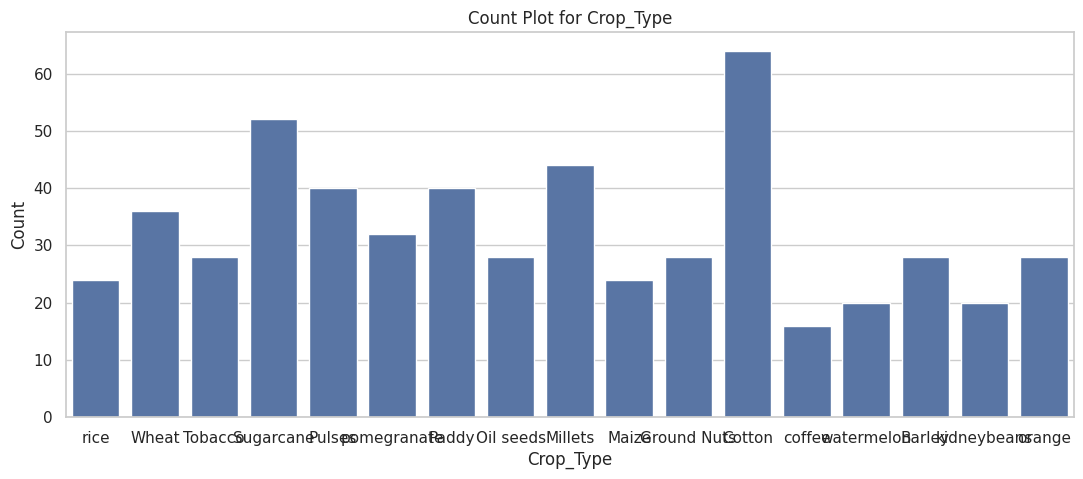

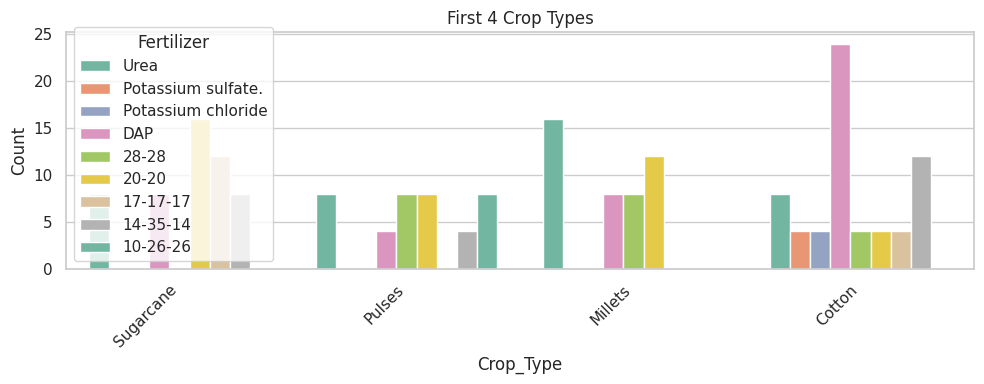

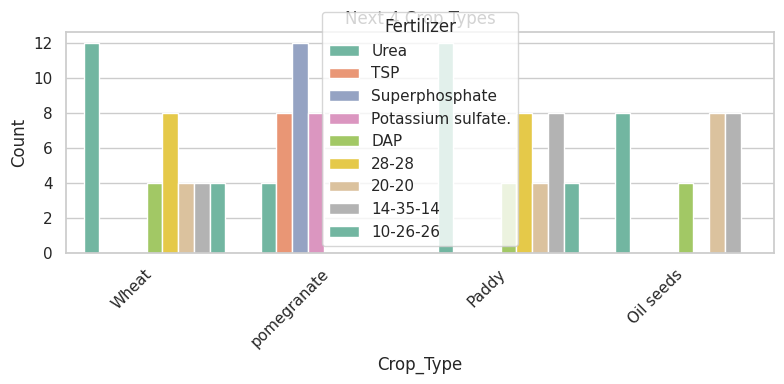

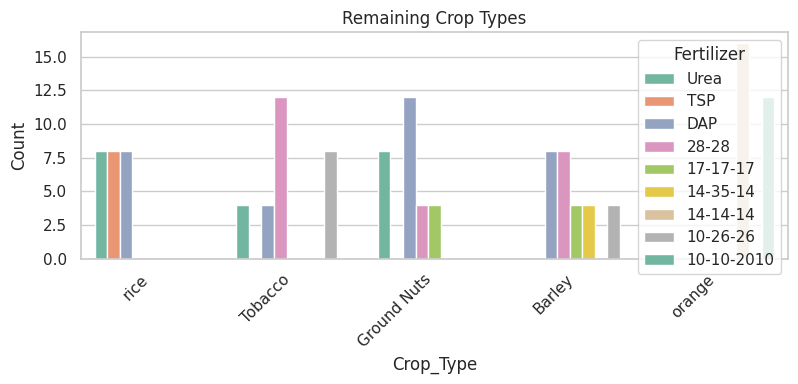

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 388 to 102
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nitrogen               441 non-null    float64
 1   Phosphorous            441 non-null    float64
 2   Potassium              441 non-null    float64
 3   Temperature            441 non-null    float64
 4   Soil_Type_Clayey       441 non-null    float64
 5   Soil_Type_Loamy        441 non-null    float64
 6   Soil_Type_Red          441 non-null    float64
 7   Soil_Type_Sandy        441 non-null    float64
 8   Crop_Type_Cotton       441 non-null    float64
 9   Crop_Type_Ground Nuts  441 non-null    float64
 10  Crop_Type_Maize        441 non-null    float64
 11  Crop_Type_Millets      441 non-null    float64
 12  Crop_Type_Oil seeds    441 non-null    float64
 13  Crop_Type_Paddy        441 non-null    float64
 14  Crop_Type_Pulses       441 non-null    float64
 15  Crop_Type

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Predicted Fertilizer: Potassium sulfate.


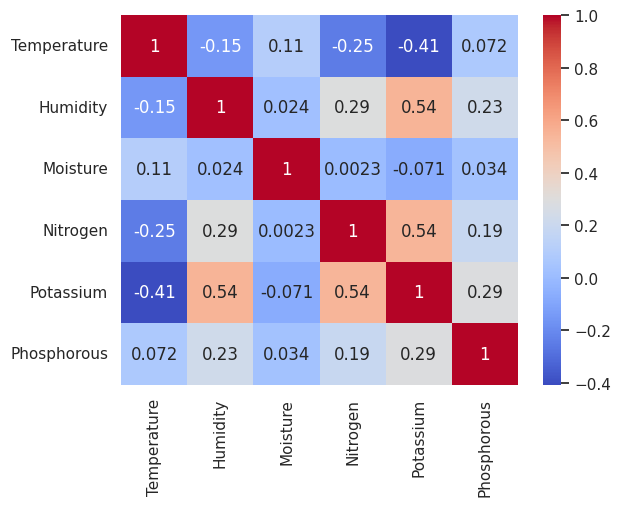

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/f2.csv")
df.head()

df.isnull().sum()

df.shape

#checking unique values
df.nunique()

df['Fertilizer'].unique()

df['Crop_Type'].unique()

#statistical parameters
df.describe(include='all')

df.info()

import numpy as np

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_features = ['Nitrogen', 'Phosphorous', 'Potassium', 'Temperature']
for column in numerical_features:
    outliers = find_outliers_iqr(df[column])
    print(f"Outliers in {column}: {outliers}")

df.drop(outliers)

#The plot that shows the count (frequency) of each unique crop type in the dataset
#The x-axis represents the different crop types.
#The y-axis represents the count (the number of occurrences) of each crop type in the dataset
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

#first 4 crop types
part1_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

# Split the data into three parts: next 4 crop types
part2_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

# Split the data into three parts: remaining crop types
part3_data = df[df['Crop_Type'].isin(df['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

corr = df.corr(numeric_only=True)
corr

sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

# categorical features  encoding
categorical_features = ['Soil_Type', 'Crop_Type']

encoder = OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore')

encoded_categorical = encoder.fit_transform(df[categorical_features])

# Create DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine with numerical features
X = pd.concat([df[numerical_features].reset_index(drop=True), encoded_df], axis=1)
y = df['Fertilizer']

# Initialize and fit the LabelEncoders
fertilizer_encoder = LabelEncoder()
y = fertilizer_encoder.fit_transform(y)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.info()

from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
print("Classification Report for Fertilizer (SVM):\n", classification_report(y_test, y_pred_svm))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create and train the KNN model
knn_model = KNeighborsClassifier()  # Initialize knn_model here
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
print("Classification Report for Fertilizer (KNN):\n", classification_report(y_test, y_pred_knn))

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200, random_state=42)
logistic_model.fit(X_train, y_train)
# Make predictions
# Changed 'logreg_model' to 'logistic_model'
y_pred_logreg = logistic_model.predict(X_test)
# Evaluate performance

print("Classification Report for Fertilizer (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)  # Initialize the model
tree_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model and print the classification report
print("Classification Report for Fertilizer (Decision Tree):\n", classification_report(y_test, y_pred_tree))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model and print the classification report
print("Classification Report for Fertilizer (Random Forest):\n", classification_report(y_test, y_pred_rf))

def predict_fertilizer(model, encoder, fertilizer_encoder, categorical_features, numerical_features):
    # Get input values from the user
    Soil_Type = input("Enter Soil Type: ")
    Crop_Type = input("Enter Crop Type: ")
    Humidity = float(input("Enter Humidity: "))
    Moisture = float(input("Enter Moisture: "))
    Nitrogen = float(input("Enter Nitrogen level: "))
    Phosphorous = float(input("Enter Phosphorus level: "))
    Potassium = float(input("Enter Potassium level: "))
    Temperature = float(input("Enter Temperature: "))

    # Create input data dictionary with consistent column names
    input_data = {
        'Soil_Type': Soil_Type,
        'Humidity': Humidity,
        'Moisture':Moisture,
        'Crop_Type': Crop_Type,
        'Nitrogen': Nitrogen,
        'Phosphorous':Phosphorous,
        'Potassium': Potassium,
        'Temperature': Temperature
    }

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # One-hot encode categorical features
    encoded_input_features = encoder.transform(input_df[['Soil_Type', 'Crop_Type']])
    encoded_input_df = pd.DataFrame(encoded_input_features, columns=encoder.get_feature_names_out(['Soil_Type', 'Crop_Type']))

    # Combine numerical and encoded features
    input_X = pd.concat([input_df[numerical_features], encoded_input_df], axis=1)  # Assign value to input_X

    # Ensure input_X has the same columns as X_train
    input_X = input_X[X_train.columns]
    # Make predictions
    predictions = model.predict(input_X)

    # Decode predictions
    predicted_fertilizer = fertilizer_encoder.inverse_transform([predictions[0]])[0]  # Get the predicted fertilizer

    return predicted_fertilizer

# Use Random Forest model for prediction
model = rf_model

predicted_fertilizer = predict_fertilizer(model, encoder, fertilizer_encoder, categorical_features, numerical_features)

print(f"Predicted Fertilizer: {predicted_fertilizer}")